# Integradores de Python

En el notebook anterior implementamos tres integradores, pero en la actualidad casi todos los lenguajes de programación tiene implementados algunos integradores. En este notebook revisaremos uno de los integradores que ya están códificados en Python, por ejemplo `quad`, `dblquad` y `tplquad` además de contar con integradores de sistemas de ODE, por ejemplo `ode` y `odeint` 

In [1]:
from pylab import * # se importa la libreria pylab
from scipy.integrate import * # se importa la libreria scipy.integrate
from numpy import * # se importa numpy
%matplotlib inline

* ¿Qué paquetes tiene la librería `scipy` ?
* En particular `scipy.integrate`

## `quad` 

In [2]:
import scipy.integrate

In [3]:
scipy.integrate?

In [4]:
quad?

Comenzaremos por el primer integrador que se aparece en la documentación de `numpy`, es decir `quad` para ello integremos la siguiente función: $f(x) = \alpha x^2 + \beta$, de $a$ a $b$,es decir, $\displaystyle \int_{a} ^{b} \alpha x^2 + \beta dx $ con $a = 0$ , $b=2$ y $\alpha = 1$ y $\beta = 3$

Definamos $f(x) = \alpha x^2 + \beta$

In [5]:
def f(x,a,b):
    return a*x**2 + b

In [6]:
f(2,1,3)

7

Ahora integremos dicha función con los límites ya mencionados 

In [7]:
quad(f, 0.0, 2.0, (1.0, 3.0,))

(8.666666666666668, 9.621932880084691e-14)

* ¿Qué es la salida del integrador?
* ¿Cuál es la solución analítica de dicha integral?
* ¿El resultado es correcto?

In [8]:
26.0/3.0

8.666666666666666

Ahora integraremos una gaussiana de menos infinito  a infinito, es decir:
$$\displaystyle \int_{-\infty} ^{\infty} \exp(-x^2) dx $$


* Escriba la solución analítica de dicha integral

In [9]:
### Definimos la gaussiana
def g(x):
    return exp(-x**2)

In [10]:
### Integramos dicha función
quad(g, -inf, inf)

(1.7724538509055159, 1.4202636780944923e-08)

* ¿El resultado es correcto?
* grafique la siguiente función $${\displaystyle f(x, \mu ,\sigma ^{2}, \alpha)=\alpha \exp \left({-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\right)} $$ para distintos valores de $\alpha > 0$, $\mu$ y $\sigma > -1$

* ¿Quá pasa si $\alpha =\dfrac{1}{\sigma \sqrt{2\pi}}$? 
* Integre dicha función de manera analítica y numericamente con `quad` de menos infinito a infinito



## `dblquad` 

Consulte la documentación de `dblquad` e integre de numericamente y analiticamenta los siguiente:

* Vemos que en la documentación se integra $\displaystyle \int_{0}^{1/2} \displaystyle \int_{0}^{1-2y} xy\,dy\,dx = \dfrac{1}{96}$
* $ \displaystyle \int_{-1}^{1} \displaystyle \int_{0}^{1} x^2 + y^2 \,dx \,dy$ 
* $\displaystyle \int_{0}^{1} \displaystyle \int_{0}^{\sqrt{1-x^2}} \sqrt{1-y^2}\,dy\,dx$


In [11]:
dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)

(0.010416666666666668, 4.101620128472366e-16)

In [12]:
1.0/96

0.010416666666666666

* Investigue que es `lambda`

## `tplquad` 

Realice lo mismo para`tplquad` e integre de numericamente y analiticamenta las siguientes:

* $ \displaystyle \int_{0}^{1/3} \displaystyle \int_{-1/2}^{0} \displaystyle \int_{0}^{1} (x + 2y + 3z)^2 \,dx \,dy\,dz$ 
* $ \displaystyle \int_{-1}^{1} \displaystyle \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \displaystyle \int_{-\sqrt{1-x^2-y^2}}^{\sqrt{1-x^2-y^2}}  \,dx \,dy\,dz$ 

## Ode

En `scipy` tenemos dos integradores de ODE, `ode` y `odeint`

* Consulte la documentación de cada uno de estos integradores

In [13]:
??odeint

Comenzaremos por integrar el oscilador armónico, definamos la función `oscilador`

In [14]:
def oscilador(x, t, para):
    return array((x[1],-(para**2)*(x[0]) ))

Integremos el oscilador con `ode`

In [15]:
t = linspace(0,100,1001)

In [16]:
t

array([   0. ,    0.1,    0.2, ...,   99.8,   99.9,  100. ])

In [17]:
xout = odeint(oscilador, [1.0, 0.0], t, args=(1.0,))

* ¿Cuál es la salida de `odeint`?

In [19]:
xout

array([[ 1.        ,  0.        ],
       [ 0.99500417, -0.0998334 ],
       [ 0.98006658, -0.19866932],
       ..., 
       [ 0.74453125,  0.66758994],
       [ 0.80745948,  0.58992567],
       [ 0.86231984,  0.50636706]])

In [20]:
type(xout)

numpy.ndarray

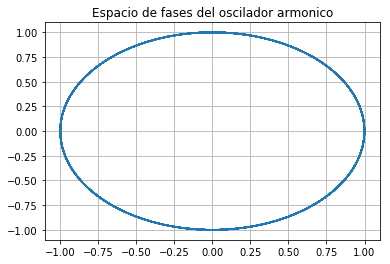

In [23]:
plot(xout[:,0], xout[:,1],)
title("Espacio de fases del oscilador armonico")
grid(True)

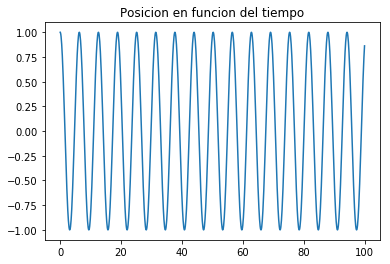

In [25]:
plot(t, xout[:,0])
title("Posicion en funcion del tiempo")

Grafiquemos la enegía como función del tiempo

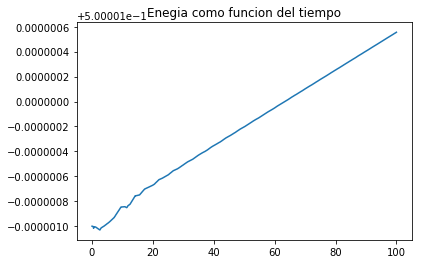

In [36]:
def energia(x):
    return 0.5*x[:,1]**2 + 0.5*x[:,0]**2 

e=energia(xout)
plot(t,e)
title("Enegia como funcion del tiempo")

Importemos nuestro archivo `integradores.py` el cual es un script que contiene nuestros funciones `metodo_euler` y `rg4` que son los integradores del notebook anterior

In [30]:
import integradores as myint

2.71828182846


#### Integremos el oscilador armónico con el método de Euler

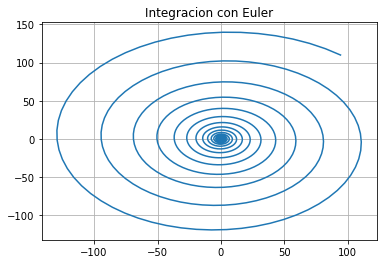

In [45]:
time, oute, = myint.metodo_euler(oscilador, 0.0, 100, [1.0, 0.0], 0.1, 1.0)

xe = []
ve = []
for i in oute:
    xe.append(i[0])
    ve.append(i[1])

plot(xe, ve)
title("Integracion con Euler")
grid(True)

#### Integremos el oscilador armónico con el método de Runge-Kutta

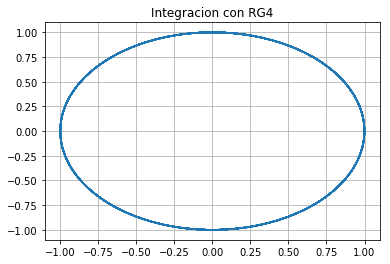

In [46]:
time, out, = myint.rg4(oscilador, 0.0, 100, [1.0, 0.0], 0.1, 1.0)

xr = []
vr = []
for i in out:
    xr.append(i[0])
    vr.append(i[1])

plot(xr, vr)
title("Integracion con RG4")
grid(True)

Ahora grafiquemos la energia como funcion del tiempo de cada uno de los integradores

In [37]:
### DEfinimos una función que calcule la energía para nuestros integradores
def energiaee(x,v):
    i=0
    suma = []
    while i < len(x):
        suma.append(0.5*x[i]**2 + 0.5*v[i]**2)
        i +=1
    return suma

In [38]:
er = energiaee(xr, vr) 
ee = energiaee(xe, ve)

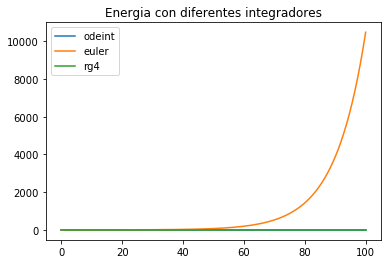

In [48]:
plot(t, e, label='odeint')
plot(time, ee, label='euler')
plot(time, er, label='rg4')
title("Energia con diferentes integradores")
legend()

Ahora integremos el péndulo 

\begin{equation}
 \dfrac{d^2 x(t)}{d t^2} + \dfrac{g}{\ell} \sin(x(t)) = 0
\end{equation}

Cuyo campo vectorial es:

\begin{eqnarray}
v = \dot{x} \\
\dot{v} = -\omega ^2\sin(x)
\end{eqnarray}

In [49]:
array([9,0])

array([9, 0])

In [50]:
def pendulo(x,t,para):
    return array((x[1],-(para**2)*(sin(x[0])) ))

In [51]:
t=linspace(0,10,101)
xpout = odeint(pendulo, [pi/2, 1.0], t, args=(1.0,))

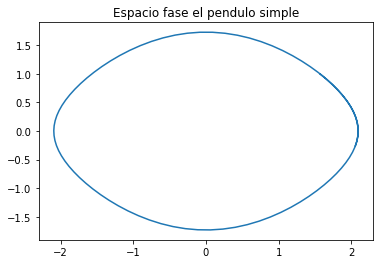

In [52]:
plot(xpout[:,0], xpout[:,1])
title("Espacio fase el pendulo simple")

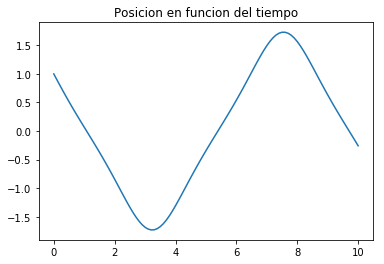

In [53]:
plot(t, xpout[:,1])
title("Posicion en funcion del tiempo")

In [58]:
def energiapen(x):
    return 0.5*x[:,1]**2 - (cos(x[:,0])) 

In [59]:
ep = energiapen(xpout)

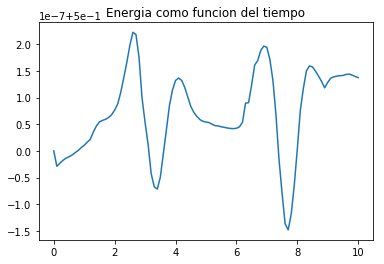

In [61]:
plot(t,ep)
title("Energia como funcion del tiempo")

In [63]:
### Generemos un número aleatorio entre -10 y -10
random.uniform(-10, 10)

-1.4074901680520533

Grafiquemos el péndulo simple para diferentes condiciones iniciales

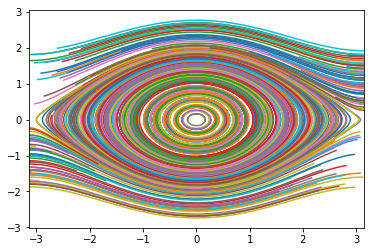

In [64]:
for i in range(300):
    x=[random.uniform(-pi, pi), random.uniform(-2, 2)]
    xpout = odeint(pendulo, x, t, args=(1.0,))
    plot(xpout[:,0], xpout[:,1])
    xlim(-pi,pi)

* ¿Cuál es la intepretación física de la gráfica anterior?
* Comente el respectivo código

### Para el siguiente sistemas de ecuaciones utilice el integrador de Euler, Runge-Kutta y odeint. 

#### Considere el modelo de Lotka-Volterra:

\begin{eqnarray}
\dot{x} = 0.6x − 1.1xy \\
\dot{y} = xy − y
\end{eqnarray}

* Utilice odeint para encontrar la solución en el espacio fase para diferentes condiciones iniciales que representen la dinámica del sistema, es decir, encuentre soluciones en el plano xy.

* Cómo se ven las soluciones en el plano (t,x) y (t,y) para una condición inicial que haga varios ciclos. Explique sus resultados.

* Obtenga las mismas soluciones utilizando los integradores de Euler y Runge-Kutta. ¿Cuales son los valores del paso h para obtener los mismos resultados que en el inciso anterior?

#### Considere el oscilador armónico armotiguiado y amortiguado con forzamiento (vistos en el notebook anterior)

\begin{equation}
\dfrac{d^2 x(t)}{d t^2} + \beta \dfrac{d x(t)}{d t} + \omega_0 ^2 x(t)=0
\end{equation}

\begin{equation}
\dfrac{d^2 x(t)}{d t^2} + \beta \dfrac{d x(t)}{d t} + \omega_0 ^2 x(t) = F_0 \cos(\omega t)
\end{equation}

* Escriba un script `oscilador.py` con dichas funciones

Si definimos $\Delta = \beta ^2 - 4\omega_0 ^2 $
* Considere diferentes condiciones iniciales y valores para $\beta < 0$ y $ \omega_0$ tal que $\Delta >0 $, e integre con  Euler, Runge-Kutta y odeint
* Realice lo mismo para $\Delta < 0$
* Y $\Delta = 0 $
* Grafique las soluciones en el plano (t,x) y (t,v) para cada uno de los casos
* Grafique para cada caso el espacio de fases
* Y la energía para cado caso con los tres integradores
* Para el oscilador con amortiguado con forzamiento considere $F_0 = 1$ y $\omega$ un número aleatorio e integre con odeint y realice la graficas antes mencionadas
* ¿Qué pasa si $\omega_0 = \omega$?